# Convolutional Neural Network Architecture

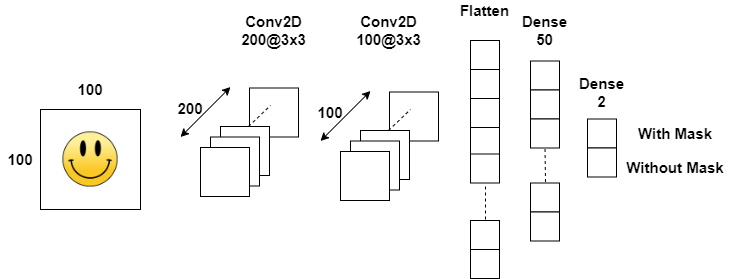

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\91787\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [10]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 844ms/step - accuracy: 0.7490 - loss: 0.5754 - val_accuracy: 0.7904 - val_loss: 0.5166
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 820ms/step - accuracy: 0.7347 - loss: 0.5804 - val_accuracy: 0.7904 - val_loss: 0.5147
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 810ms/step - accuracy: 0.7353 - loss: 0.5823 - val_accuracy: 0.7904 - val_loss: 0.5162
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 854ms/step - accuracy: 0.7716 - loss: 0.5377 - val_accuracy: 0.7904 - val_loss: 0.5346
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 828ms/step - accuracy: 0.7296 - loss: 0.5933 - val_accuracy: 0.7904 - val_loss: 0.5137
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 784ms/step - accuracy: 0.7647 - loss: 0.5517 - val_accuracy: 0.7904 - val_loss: 0.5300
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 793ms/step - accuracy: 0.7268 - loss: 0.5888 - val_accuracy: 0.7904 - val_loss: 0.5138
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 901ms/step - accuracy: 0.7583 - loss: 0.5566 - val_accu

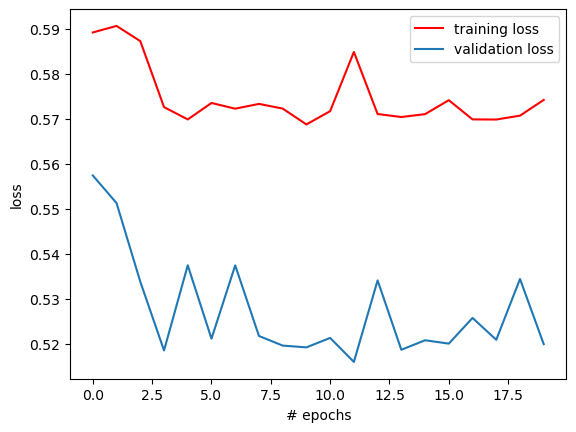

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

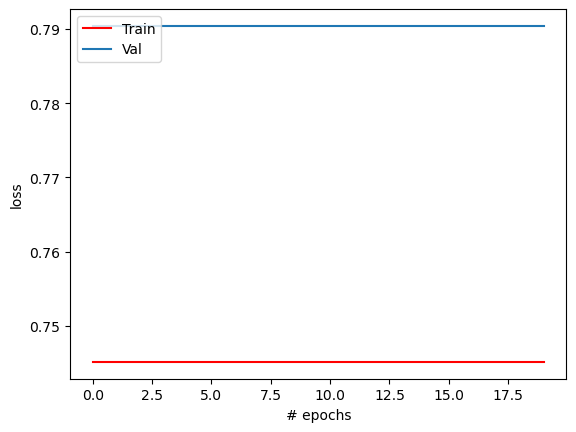

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [8]:
print(model.evaluate(test_data,test_target))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.6654 - loss: 0.6518
[0.6504184007644653, 0.6666666865348816]
